In [12]:
#Dependencies
import requests
import json
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# The path to our CSV file
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas
su_vs_gdp_o_df = pd.read_csv(file_gdp)
su_vs_gdp_o_df.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,year_gdp,gdp_per_capita,generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.160000e+09,$796.00,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.160000e+09,$796.00,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.160000e+09,$796.00,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.160000e+09,$796.00,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.160000e+09,$796.00,Boomers


In [14]:

su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita':'first'}).reset_index()
su_vs_gdp_df.head()

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
0,Albania1987,Albania,1987,73,2709600,31.85,2.160000e+09,$796.00
1,Albania1988,Albania,1988,63,2764300,32.46,2.130000e+09,$769.00
2,Albania1989,Albania,1989,68,2803100,33.40,2.340000e+09,$833.00
3,Albania1992,Albania,1992,47,2822500,18.00,7.090000e+08,$251.00
4,Albania1993,Albania,1993,73,2807300,32.56,1.230000e+09,$437.00


In [15]:
su_vs_gdp_df.to_csv('cleaned_su_vs_gdp.csv')
file_gdp2 = "cleaned_su_vs_gdp.csv"
su_vs_gdp_c_df = pd.read_csv(file_gdp2)

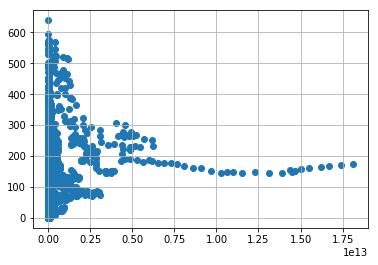

In [16]:
x_axis = su_vs_gdp_c_df['year_gdp']
y_axis = su_vs_gdp_c_df['suicides/100k pop']
plt.grid(True)

#plt.savefig("Sui_vs_GDP_Scatter.png")


plt.scatter(x_axis, y_axis)

In [17]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

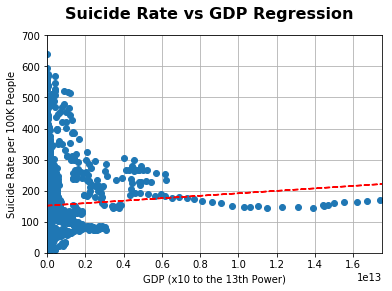

In [18]:
fig, ax = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Regression", fontsize=16, fontweight="bold")

ax.set_xlim(0, 17500000000000)
ax.set_ylim(0, 700)

ax.set_xlabel("GDP (x10 to the 13th Power)")
ax.set_ylabel("Suicide Rate per 100K People")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r--')
plt.grid(True)

plt.savefig("Sui_vs_GDP_regression.png")

plt.show()

In [19]:
(t_stat, p) = stats.ttest_ind(x_axis, y_axis, equal_var=False)
p

3.402836006166142e-47

In [20]:
(t_stat, p) = stats.ttest_ind(x_axis, y_axis, equal_var=False)
t_stat

14.760431231640396

In [21]:
su_vs_gdp_2015_df = su_vs_gdp_c_df.query("year == '2015'")
su_vs_gdp_2015_nous_df = su_vs_gdp_2015_df.query("country != 'United States'")
su_vs_gdp_2015_nous_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
48,48,Antigua and Barbuda2015,Antigua and Barbuda,2015,1,91889,15.62,1.360000e+09,"$14,853.00"
79,79,Argentina2015,Argentina,2015,3073,39699624,112.13,5.950000e+11,"$14,981.00"
103,103,Armenia2015,Armenia,2015,74,2795335,45.28,1.060000e+10,"$3,775.00"
148,148,Australia2015,Australia,2015,3027,22240785,154.18,1.350000e+12,"$60,656.00"
179,179,Austria2015,Austria,2015,1251,8219386,194.62,3.820000e+11,"$46,484.00"


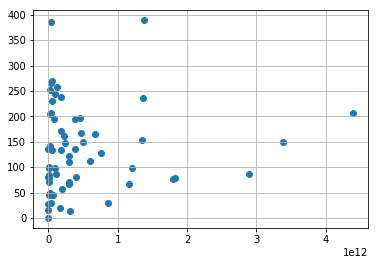

In [22]:
x_axis_2015 = su_vs_gdp_2015_nous_df['year_gdp']
y_axis_2015 = su_vs_gdp_2015_nous_df['suicides/100k pop']

plt.grid(True)

#plt.savefig("Sui_vs_GDP_Scatter_2015.png")

plt.scatter(x_axis_2015, y_axis_2015)

In [23]:
(slope, intercept, _, _, _) = linregress(x_axis_2015, y_axis_2015)
fit = slope * x_axis_2015 + intercept

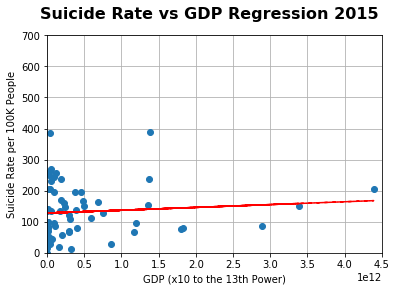

2.501178306126408e-05

In [24]:
fig, ax_2015 = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Regression 2015", fontsize=16, fontweight="bold")

ax_2015.set_xlim(0, 4500000000000)
ax_2015.set_ylim(0, 700)

ax_2015.set_xlabel("GDP (x10 to the 13th Power)")
ax_2015.set_ylabel("Suicide Rate per 100K People")

ax_2015.plot(x_axis_2015, y_axis_2015, linewidth=0, marker='o')
ax_2015.plot(x_axis_2015, fit, 'r--')
plt.grid(True)

plt.savefig("Regression_2015.png")

plt.show()
(t_stat, p) = stats.ttest_ind(x_axis_2015, y_axis_2015, equal_var=False)
p

In [25]:
(t_stat, p) = stats.ttest_ind(x_axis_2015, y_axis_2015, equal_var=False)
t_stat

4.568169046616642

In [26]:
su_vs_gdp_2005_df = su_vs_gdp_c_df.query("year == '2005'")
su_vs_gdp_2005_nous_df = su_vs_gdp_2005_df.query("country != 'United States'")
su_vs_gdp_2005_nous_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
16,16,Albania2005,Albania,2005,0,2783320,0.00,8.160000e+09,"$2,931.00"
40,40,Antigua and Barbuda2005,Antigua and Barbuda,2005,0,80809,0.00,1.020000e+09,"$12,649.00"
69,69,Argentina2005,Argentina,2005,3058,35550617,128.18,1.990000e+11,"$5,590.00"
112,112,Aruba2005,Aruba,2005,10,93728,99.58,2.330000e+09,"$24,870.00"
169,169,Austria2005,Austria,2005,1399,7827461,235.25,3.160000e+11,"$40,367.00"


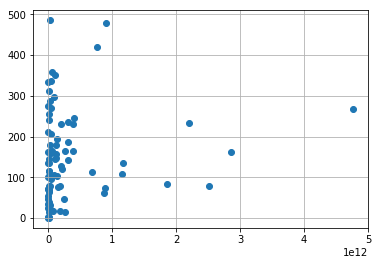

In [27]:
x_axis_2005 = su_vs_gdp_2005_nous_df['year_gdp']
y_axis_2005 = su_vs_gdp_2005_nous_df['suicides/100k pop']

plt.grid(True)

#plt.savefig("Sui_vs_GDP_Scatter_2005.png")

plt.scatter(x_axis_2005, y_axis_2005)

In [28]:
(slope, intercept, _, _, _) = linregress(x_axis_2005, y_axis_2005)
fit = slope * x_axis_2005 + intercept

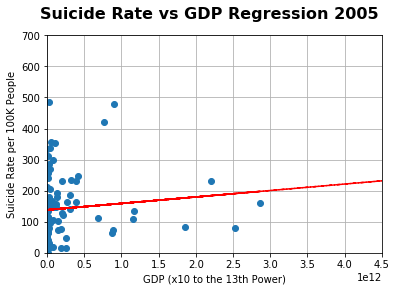

0.00016372935198783524

In [29]:
fig, ax_2005 = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Regression 2005", fontsize=16, fontweight="bold")

ax_2005.set_xlim(0, 4500000000000)
ax_2005.set_ylim(0, 700)

ax_2005.set_xlabel("GDP (x10 to the 13th Power)")
ax_2005.set_ylabel("Suicide Rate per 100K People")

ax_2005.plot(x_axis_2005, y_axis_2005, linewidth=0, marker='o')
ax_2005.plot(x_axis_2005, fit, 'r--')
plt.grid(True)

plt.savefig("Regression_2005.png")

plt.show()
(t_stat, p) = stats.ttest_ind(x_axis_2005, y_axis_2005, equal_var=False)
p

In [30]:
(t_stat, p) = stats.ttest_ind(x_axis_2005, y_axis_2005, equal_var=False)
t_stat

3.9514910303009563

In [36]:
print("T-Test :", (t_stat))
print("P-Value :",(p))

T-Test : 3.9514910303009563
P-Value : 0.00016372935198783524
